<a href="https://colab.research.google.com/github/emiliomercuri/FundEngAmb2025/blob/main/aulas/aula03_Reator_Ricatti/2025_Reator_Riccati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo 5: RMC com reação de 2$^{\rm a}$ ordem (Reator de Riccati)

Um RMC opera com uma reação de 2$^{\rm a}$ ordem para destruição de uma substância, conforme ilustrado na Figura abaixo. A vazão de entrada é a mesma da saída, $Q$, a concentração afluente $C_a$ é constante, e a condição inicial é o reator com concentração $C_0$. Obter a solução geral em função do tempo.

In [2]:
# insert image in a text cell from link in dropbox
from IPython.display import Image
Image(url="https://www.dropbox.com/scl/fi/q2kae2lhvhlfxscvahwq4/reator.png?rlkey=2m9mil6igdpfmj9ak2qewzyop&st=zj65853w&dl=1", width=300)

### Solução

A solução demonstrada no material é:

\begin{equation}
C = \frac{1}{ k \left( C_1 e^{\alpha_1 t} + C_2 e^{\alpha_2 t}  \right)  }
\left( C_1 \alpha_1 e^{\alpha_1 t} + C_2 \alpha_2 e^{\alpha_2 t} \right)
\end{equation}

sendo:
\begin{equation}
\alpha_{1,2} = - \frac{Q}{2V} \pm \frac{\sqrt{\left( \frac{Q}{V} \right)^2 + 4 \frac{Q}{V} C_a k }}{2}
\end{equation}

As constantes são:
\begin{equation}
 C_1 =  1 - C_2
\end{equation}

\begin{equation}
C_2 = \frac{C_0 k - \alpha_1} {(\alpha_2 - \alpha_1) }
\end{equation}

In [ ]:
from sympy import *
from sympy.plotting import plot

In [ ]:
C, C1, C2, t = symbols('C C1 C2 t')

#k = 0.1 # m3/(kg s)
k = 0.5 # m3/(kg s)
V = 10 # Litros
Q = 1 # m3/s
Ca = 2 # mg/L
C0 = 2.1 # mg/L

lamb =  Q/V

alfa1 =  -lamb/2 + sqrt(lamb**2 + 4*lamb*Ca*k)/2
alfa2 =  -lamb/2 - sqrt(lamb**2 + 4*lamb*Ca*k)/2

u = C1*exp(alfa1*t) + C2*exp(alfa2*t)
print(u)

C2 = (C0*k-alfa1)/(alfa2-alfa1)
C1 = 1 - C2

C = 1/(k*( C1*exp(alfa1*t) + C2*exp(alfa2*t))) * (C1*alfa1*exp(alfa1*t) + C2*alfa2*exp(alfa2*t))
C = simplify(C)
print(C)


C1*exp(0.270156211871642*t) + C2*exp(-0.370156211871642*t)
(0.599182536897088*exp(0.640312423743285*t) + 0.450817463102912)/(1.10895569038733*exp(0.640312423743285*t) - 0.608955690387333)


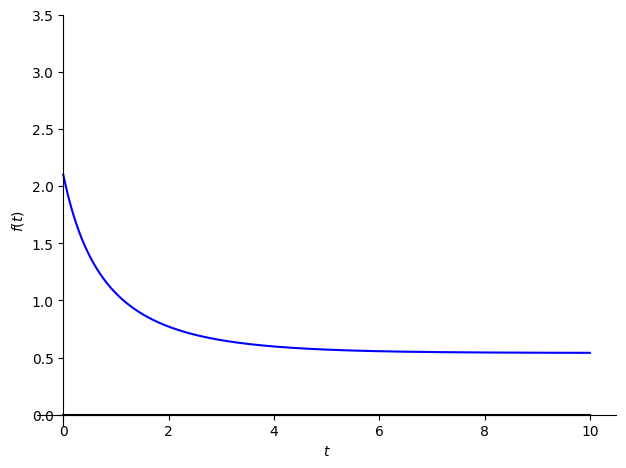

In [ ]:
# Gráfico do Resultado
p = plot(C,(t, 0, 10), show=False, ylim = (-0.1,3.5))
# Customize the x-axis to be at y=0
p[0].line_color = 'blue'

# Add a horizontal line at y=0 (only to adjust the graph)
p.extend(plot(0, (t, 0, 10), line_color='black', show=False))

p.show()